In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d saumyamohandas/animal-dataset

 69% 43.0M/62.3M [00:00<00:00, 87.7MB/s]
100% 62.3M/62.3M [00:00<00:00, 93.3MB/s]


In [ ]:
!unzip /content/animal-dataset.zip

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in

#Data Augmentation

In [ ]:
#import the necessary lin
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#data augmentation for training variable
train_datagen= ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)

In [ ]:
#data augmentation for training variable
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
#data augmentation on the training data

x_train = train_datagen.flow_from_directory("/content/dataset/Training",
                                            target_size=(64,64),
                                            class_mode= 'categorical',
                                            batch_size= 100)

Found 1238 images belonging to 4 classes.


In [ ]:
#data augmentation on the testing data

x_test = test_datagen.flow_from_directory("/content/dataset/Testing",
                                            target_size=(64,64),
                                            class_mode= 'categorical',
                                            batch_size= 100)

Found 326 images belonging to 4 classes.


#CNN Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [ ]:
#adding layers
model= Sequential()
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(64,64,3))) #convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling layer
model.add(Flatten()) #flatten layer

model.add(Dense(300,activation='relu')) #hidden layer1
model.add(Dense(150,activation='relu')) #hidden layer2

model.add(Dense(4,activation='softmax')) #output layer

In [ ]:
#compile the model
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
model.fit_generator(x_train, steps_per_epoch= len(x_train),epochs=10, validation_data=x_test, validation_steps=len(x_test))

<ipython-input-21-ee3c11efab49>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch= len(x_train),epochs=10, validation_data=x_test, validation_steps=len(x_test))


Epoch 1/10
13/13 [==============================] - 12s 828ms/step - loss: 2.2621 - accuracy: 0.2859 - val_loss: 1.3325 - val_accuracy: 0.3620
Epoch 2/10
13/13 [==============================] - 11s 874ms/step - loss: 1.3007 - accuracy: 0.3982 - val_loss: 1.1939 - val_accuracy: 0.3712
Epoch 3/10
13/13 [==============================] - 11s 822ms/step - loss: 1.1209 - accuracy: 0.5380 - val_loss: 0.9497 - val_accuracy: 0.6871
Epoch 4/10
13/13 [==============================] - 12s 888ms/step - loss: 0.9826 - accuracy: 0.6050 - val_loss: 0.8754 - val_accuracy: 0.6503
Epoch 5/10
13/13 [==============================] - 11s 870ms/step - loss: 0.8569 - accuracy: 0.6648 - val_loss: 0.6985 - val_accuracy: 0.7209
Epoch 6/10
13/13 [==============================] - 9s 690ms/step - loss: 0.7771 - accuracy: 0.6801 - val_loss: 0.7102 - val_accuracy: 0.7515
Epoch 7/10
13/13 [==============================] - 10s 726ms/step - loss: 0.6874 - accuracy: 0.7375 - val_loss: 0.5269 - val_accuracy: 0.7945


In [ ]:
#save the model
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Test the model

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

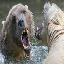

In [24]:
#testing 1
img=image.load_img('/content/dataset/Testing/bears/k4 (102).jpg', target_size=(64,64))

In [25]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 167ms/step


'crows'

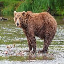

In [28]:
#testing 2
img=image.load_img('/content/dataset/Testing/bears/m5.jpeg', target_size=(64,64))
img

In [29]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 25ms/step


'bears'

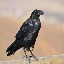

In [30]:
#testing 3
img=image.load_img('/content/dataset/Testing/crows/Z1  (63).jpg', target_size=(64,64))
img

In [31]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 27ms/step


'crows'

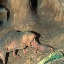

In [33]:
#testing 4
img=image.load_img('/content/dataset/Testing/rats/images (58).jpeg', target_size=(64,64))
img

In [34]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 31ms/step


'rats'